In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [3]:
df =pd.DataFrame()

In [4]:
df['X'] =X.reshape(100)

In [5]:
df['y'] = y

Text(0.5, 1.0, 'X vs y')

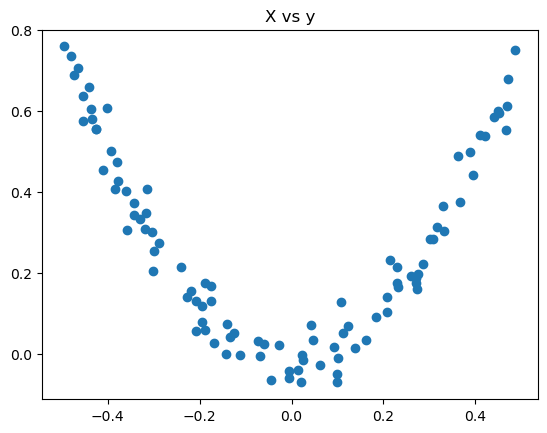

In [8]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [9]:
df['pred1']= df['y'].mean()

In [21]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [11]:
df['res1']=df['y'] - df['pred1']

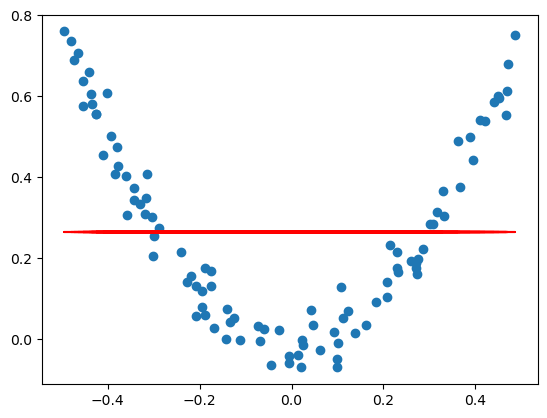

In [16]:
 plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color ='red')

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree1 =DecisionTreeRegressor(max_leaf_nodes=8)

In [18]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

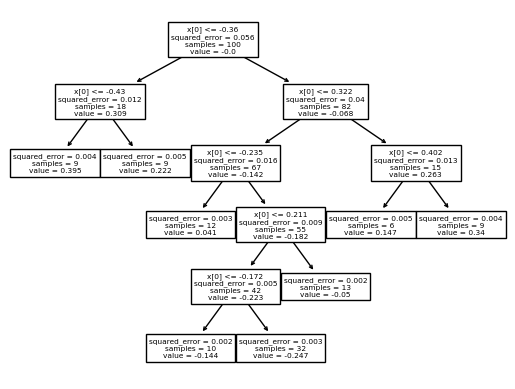

In [20]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [22]:
X_test = np.linspace(-0.5,0.5,500)


In [24]:
y_pred = 0.265458+ tree1.predict(X_test.reshape(500,1))

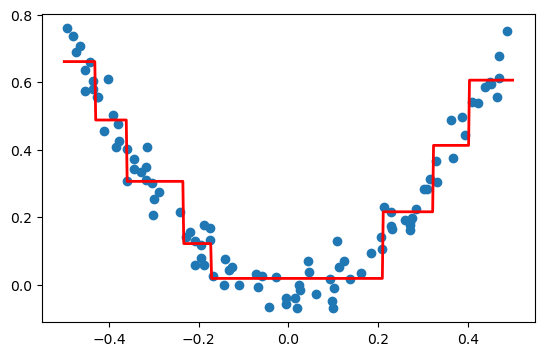

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth = 2,color ='red')
plt.scatter(df['X'],df['y'])

In [28]:
df['pred2'] = 0.265458+ tree1.predict(df['X'].values.reshape(100,1))

In [29]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [31]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [32]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [33]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [34]:
y_pred =0.265458 +sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

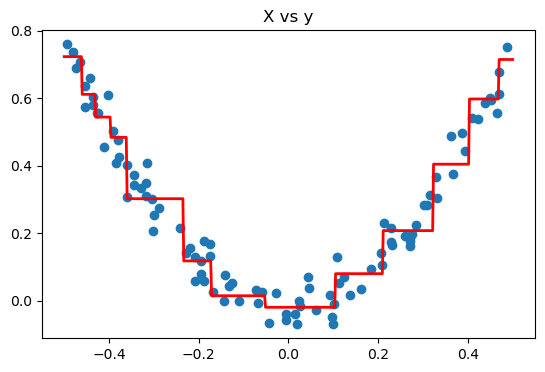

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2,color = 'red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import  GradientBoostingRegressor

In [56]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [57]:
df = pd.read_csv('housing.csv',header=None,delimiter=r'\s+',names=column_names)

In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [59]:
X = df.iloc[:,:13]
y = df.iloc[:,13]

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [61]:
gradientregressor =GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [62]:
model = gradientregressor.fit(X_train,y_train)

In [63]:
y_pred =model.predict(X_test)

In [64]:
r2_score(y_pred,y_test)

0.5245303870197296

In [67]:
LR ={'learning_rate':[0.15,0.1,0.10,0.05,],'n_estimators':[100,150,200,250]}
tuning =GridSearchCV(estimator=GradientBoostingRegressor(),
                     param_grid=LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_


({'learning_rate': 0.05, 'n_estimators': 200}, 0.8520084218408307)